In [134]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import Hull_White as hw
import mortgage_np as m
import Discount_Functions as disc_func
import itertools
import matplotlib.pyplot as plt

import MFE230M_HW2_main as hw2_module

%matplotlib inline

# Question a, b, c: 
### Using non-time-varying hazard model
### The parameters estimated from MATLAB are:

gamma = 0.0568

p = 2.9025

beta_1 = -12.6051

beta_2 = -2.0992

## Get V, V+, V- 

In [135]:
r0 = 0.01816
dr = 10e-5
num_sims = hw2_module.num_sims
(bond_prices, standard_errors, summary_CF, summary_CF_anti, 
 r_matrix, r_anti_matrix, cum_df_matrix, cum_df_anti_matrix,
 pricing_arr, pricing_arr_anti, r_matrix_original, r_anti_matrix_original) = hw2_module.get_V(r0)

(bond_prices_p, standard_errors_p, summary_CF_p, summary_CF_anti_p,
 r_matrix_p, r_anti_matrix_p, cum_df_matrix_p, cum_df_anti_matrix_p,
 pricing_arr_p, pricing_arr_anti_p, r_matrix_original_p, r_anti_matrix_original_p)= hw2_module.get_V(r0+dr)

(bond_prices_m, standard_errors_m, summary_CF_m, summary_CF_anti_m,
 r_matrix_m, r_anti_matrix_m, cum_df_matrix_m, cum_df_anti_matrix_m,
 pricing_arr_m, pricing_arr_anti_m, r_matrix_original_m, r_anti_matrix_original_m) = hw2_module.get_V(r0-dr)

......

In [136]:
#saving data for plotting later
r_matrix_original_part_abc = r_matrix_original
r_anti_matrix_original_part_abc = r_anti_matrix_original

# Residual Class

In [137]:
residual_arr = hw2_module.get_residual_V(r0,summary_CF, summary_CF_anti, r_matrix, r_anti_matrix, cum_df_matrix, cum_df_anti_matrix)
res_V0 = np.mean(residual_arr)
res_std = np.std(residual_arr) / math.sqrt(num_sims)

residual_arr_p = hw2_module.get_residual_V(r0+dr,summary_CF_p, summary_CF_anti_p, r_matrix_p, r_anti_matrix_p, cum_df_matrix_p, cum_df_anti_matrix_p)
res_V_plus = np.mean(residual_arr_p)

residual_arr_m = hw2_module.get_residual_V(r0-dr,summary_CF_m, summary_CF_anti_m, r_matrix_m, r_anti_matrix_m, cum_df_matrix_m, cum_df_anti_matrix_m)
res_V_minus = np.mean(residual_arr_m)

# Duration

In [138]:
HW = hw.Hull_White()
bond_prices_p = [float('%.3f' % x) for x in bond_prices_p]
bond_prices_m = [float('%.3f' % x) for x in bond_prices_m]

# Calculate effective duration
eff_durs = HW.Effective_Duration(bond_prices, bond_prices_p, bond_prices_m, dr)
eff_durs = [float('%.3f' % x) for x in eff_durs]

res_dur = HW.Effective_Duration(res_V0, res_V_plus, res_V_minus, dr)

# Convexity

In [139]:
# Calculate effective convexity
eff_conv = HW.Effective_Convexity(bond_prices, bond_prices_p, bond_prices_m, dr)
eff_conv = [float('%.3f' % x) for x in eff_conv]
res_conv = HW.Effective_Convexity(res_V0, res_V_plus, res_V_minus, dr)

# OAS

In [140]:
final_oas_arr = hw2_module.get_OAS(pricing_arr, pricing_arr_anti, r_matrix, r_anti_matrix)

# Build results dataframe

In [141]:
# merge results into dataframe
cols = (pricing_arr[0]).columns
cols = cols[:len(cols)-1]
df = pd.DataFrame([bond_prices, standard_errors, eff_durs, eff_conv, final_oas_arr], columns = cols,
                  index=['Bond Prices', 'Standard Errors', 'Effective Duration', 'Effective Convexity','OAS'])
df['R'] = [res_V0, res_std, res_dur, res_conv, np.nan]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df

,CG,VE,CM,GZ,TC,CZ,CA,CY,R
Bond Prices,5440586.275,15364.030,15062604.596,24050406.680,14361120.076,21124751.338,79425051.325,23691161.002,462242.353
Standard Errors,14803.036,237.701,270181.838,1296110.639,460720.153,729378.671,739257.298,990946.217,6464.237
Effective Duration,1.681,5.072,3.503,5.481,4.415,4.189,2.423,4.597,-4.568
Effective Convexity,2.224,24.082,13.419,32.523,22.715,20.141,4.856,22.224,-27.984
OAS,0.016,0.010,0.011,0.007,0.006,0.000,0.011,0.003,nan


# Question d, e, f: 
### Using time-varying hazard model
### The parameters estimated from MATLAB are:

gamma_non = 0.0048375

p_non = 1.31377

beta_1_non = 69.75265

beta_2_non = -0.4082

# Changing Parameters

In [142]:
hw2_module.gamma = 0.0048375
hw2_module.p = 1.31377
hw2_module.beta_1 = 69.75265
hw2_module.beta_2 = -0.4082
hw2_module.beta = np.array([hw2_module.beta_1, hw2_module.beta_2])

# Get V, V+, V-

In [143]:
(bond_prices, standard_errors, summary_CF, summary_CF_anti, 
 r_matrix, r_anti_matrix, cum_df_matrix, cum_df_anti_matrix,
 pricing_arr, pricing_arr_anti, r_matrix_original, r_anti_matrix_original) = hw2_module.get_V(r0)

(bond_prices_p, standard_errors_p, summary_CF_p, summary_CF_anti_p,
 r_matrix_p, r_anti_matrix_p, cum_df_matrix_p, cum_df_anti_matrix_p,
 pricing_arr_p, pricing_arr_anti_p, r_matrix_original_p, r_anti_matrix_original_p)= hw2_module.get_V(r0+dr)

(bond_prices_m, standard_errors_m, summary_CF_m, summary_CF_anti_m,
 r_matrix_m, r_anti_matrix_m, cum_df_matrix_m, cum_df_anti_matrix_m,
 pricing_arr_m, pricing_arr_anti_m, r_matrix_original_m, r_anti_matrix_original_m) = hw2_module.get_V(r0-dr)

......

# Residual Class

In [144]:
residual_arr = hw2_module.get_residual_V(r0,summary_CF, summary_CF_anti, r_matrix, r_anti_matrix, cum_df_matrix, cum_df_anti_matrix)
res_V0 = np.mean(residual_arr)
res_std = np.std(residual_arr) / math.sqrt(num_sims)

residual_arr_p = hw2_module.get_residual_V(r0+dr,summary_CF_p, summary_CF_anti_p, r_matrix_p, r_anti_matrix_p, cum_df_matrix_p, cum_df_anti_matrix_p)
res_V_plus = np.mean(residual_arr_p)

residual_arr_m = hw2_module.get_residual_V(r0-dr,summary_CF_m, summary_CF_anti_m, r_matrix_m, r_anti_matrix_m, cum_df_matrix_m, cum_df_anti_matrix_m)
res_V_minus = np.mean(residual_arr_m)

# Duration

In [145]:
bond_prices_p = [float('%.3f' % x) for x in bond_prices_p]
bond_prices_m = [float('%.3f' % x) for x in bond_prices_m]

# Calculate effective duration
eff_durs = HW.Effective_Duration(bond_prices, bond_prices_p, bond_prices_m, dr)
eff_durs = [float('%.3f' % x) for x in eff_durs]

res_dur = HW.Effective_Duration(res_V0, res_V_plus, res_V_minus, dr)

# Convexity

In [146]:
# Calculate effective convexity
eff_conv = HW.Effective_Convexity(bond_prices, bond_prices_p, bond_prices_m, dr)
eff_conv = [float('%.3f' % x) for x in eff_conv]
res_conv = HW.Effective_Convexity(res_V0, res_V_plus, res_V_minus, dr)

# OAS

In [147]:
final_oas_arr = hw2_module.get_OAS(pricing_arr, pricing_arr_anti, r_matrix, r_anti_matrix)

# Build results dataframe

In [148]:
# merge results into dataframe
cols = (pricing_arr[0]).columns
cols = cols[:len(cols)-1]
df = pd.DataFrame([bond_prices, standard_errors, eff_durs, eff_conv, final_oas_arr], columns = cols,
                  index=['Bond Prices', 'Standard Errors', 'Effective Duration', 'Effective Convexity','OAS'])
df['R'] = [res_V0, res_std, res_dur, res_conv, np.nan]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df

,CG,VE,CM,GZ,TC,CZ,CA,CY,R
Bond Prices,5440586.275,15364.030,15062604.596,24050406.680,14361120.076,21124751.338,79425051.325,23691161.002,462242.353
Standard Errors,14803.036,237.701,270181.838,1296110.639,460720.153,729378.671,739257.298,990946.217,6464.237
Effective Duration,1.681,5.072,3.503,5.481,4.415,4.189,2.423,4.597,-4.568
Effective Convexity,2.224,24.082,13.419,32.523,22.715,20.141,4.856,22.224,-27.984
OAS,0.016,0.010,0.011,0.007,0.006,0.000,0.011,0.003,nan


# Question g

The OAS value is the option adjusted spread for the bond defined as an average spread to the riskless rate measured across all simulated cash flow trials. To get the present value of the discounted cash flows to equal the observed current market price, a constant spread is added. We are simulating future rates, but they are uncertain. Therefore, the MBS spread will be less because the homeowner’s option to prepay is valuable. The OAS reflects the spread after adjusting for this option. The option adjusted spread then equals:
            
            Option cost = static spread – option adjusted spread

The OAS for our results was positive, indicating there is an uncertainty about future interest rates. However, it is small indicating the uncertainty is not so high as to drive up costs significantly for the option of the homeowner to prepay.

# Question h

When calculating the hazard function for the non-time varying valuation, the covariates are assumed to be static over the life of the “individual” mortgage (contract). However, the hazard function for the time-varying valuation assumed the observed covariates vary over time. In terms of the non-time varying hazard function, the covariate is only evaluated at the termination period. For the time-varying covariate the covariate is evaluated at the beginning of every month.
Thus the risk period for the non-time varying mortgage is only the termination date, but there are multiple risk periods for the time-varying case. Therefore, for the time-varying hazard model is no longer a proportional model because the covariates vary differently for different mortgages.
For example, the non-time varying covariate appears like this:




| Loan ID | Summer Month | Coupon Gap|
| -- |:-:| ---:|
| 1  | 0 | 123 |


 
The time-varying covariate appears like this though:

| Loan ID | Summer Month | Coupon Gap|
| -- |:-:| ---:|
| 1  | 0 | 134 |
| 1  | 0 | 153 |
| 1  | 0 | 122 |
| 1  | 0 | 191 |

The “prop hatz.m” function uses MLE estimation to get the parameters for the hazard function for time varying and non-time varying inputs. For the non-time varying hazard function, the likelihood of payment in period t is not affected by past values of the covariates, but in the time varying case the likelihood of payment depends on the entire history of covariates. The solution to the time-varying case is to estimate the condition of survivability at the beginning of each month. So there will be one episode per loan, per month. Thus, as explained before as well there are much more inputs influencing the value of the parameters given by the MLE estimation. These parameters determine the hazard function and therefore result in different hazard functions for time varying and non-time varying inputs. 

# Non-Time-Varying Avg Hazard Rate Plots

In [149]:
hw2_module.gamma = 0.0568
hw2_module.p = 2.9025
hw2_module.beta_1 = -12.6051
hw2_module.beta_2 = -2.0992
hw2_module.beta = np.array([hw2_module.beta_1, hw2_module.beta_2])

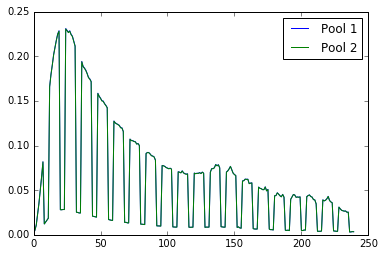

In [150]:
avg_hazard_rate_arr_pool1 = hw2_module.avg_hazard_rate(0, r_matrix_original_part_abc, r_anti_matrix_original_part_abc, num_sims)
avg_hazard_rate_arr_pool2 = hw2_module.avg_hazard_rate(1, r_matrix_original_part_abc, r_anti_matrix_original_part_abc, num_sims)
plt.plot(avg_hazard_rate_arr_pool1[0],label='Pool 1')
plt.plot(avg_hazard_rate_arr_pool2[0],label='Pool 2')
plt.legend()

# Time-Varying Avg Hazard Rate Plots

In [151]:
hw2_module.gamma = 0.0048375
hw2_module.p = 1.31377
hw2_module.beta_1 = 69.75265
hw2_module.beta_2 = -0.4082
hw2_module.beta = np.array([hw2_module.beta_1, hw2_module.beta_2])

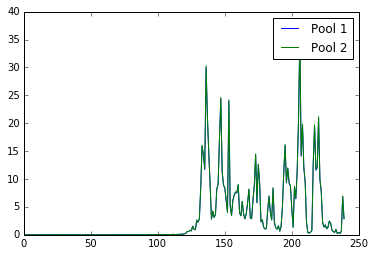

In [152]:
avg_hazard_rate_arr_pool1 = hw2_module.avg_hazard_rate(0, r_matrix_original, r_anti_matrix_original, num_sims)
avg_hazard_rate_arr_pool2 = hw2_module.avg_hazard_rate(1, r_matrix_original, r_anti_matrix_original, num_sims)
plt.plot(avg_hazard_rate_arr_pool1[0],label='Pool 1')
plt.plot(avg_hazard_rate_arr_pool2[0],label='Pool 2')
plt.legend()